# Cancer segmentation with Watershed Algorithm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Segmenting lesions

#### Lungs

##### Loading image 

In [ ]:
# import libraries
import numpy as np
import cv2, matplotlib.pyplot as plt
%matplotlib inline

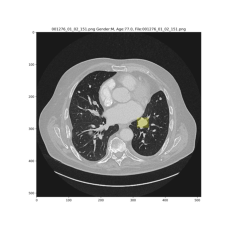

In [ ]:
# read image and show
img = cv2.imread('drive/My Drive/masks/001276_01_02_151.png')
# convert to RGB mode
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img)

##### Performing Otsu's binarization

Threshold limit: 134.0


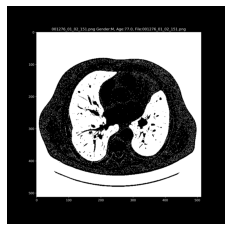

In [ ]:
# performing otsu's binarization
# converting to gray scale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
print("Threshold limit: " + str(ret))

plt.axis('off')
plt.imshow(thresh, cmap = 'gray')

##### Removing noise and realizing background and foreground

In [ ]:
# noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

# sure background area
bkgr = cv2.dilate(opening, kernel, iterations = 3)

# sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, frgr = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
frgr = np.uint8(frgr)
unknown = cv2.subtract(bkgr,frgr)

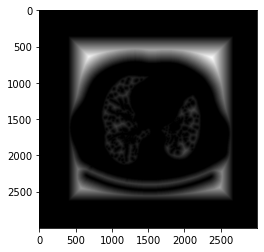

In [ ]:
plt.imshow(dist_transform, cmap = 'gray')

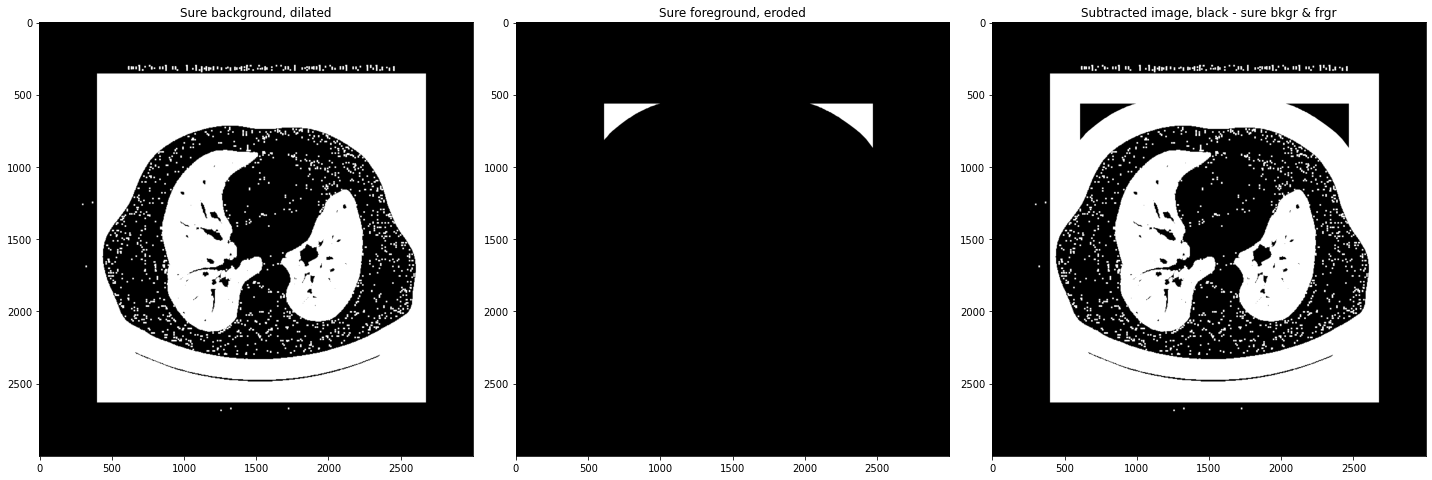

In [ ]:
fig = plt.figure(figsize = (20, 10)) # to change figsize
plt.subplot(131)
plt.imshow(bkgr, cmap = 'gray')
plt.title('Sure background, dilated')

plt.subplot(132)
plt.imshow(frgr, cmap = 'gray')
plt.title('Sure foreground, eroded')

plt.subplot(133)
plt.imshow(unknown, cmap = 'gray')
plt.title('Subtracted image, black - sure bkgr & frgr')
plt.tight_layout()


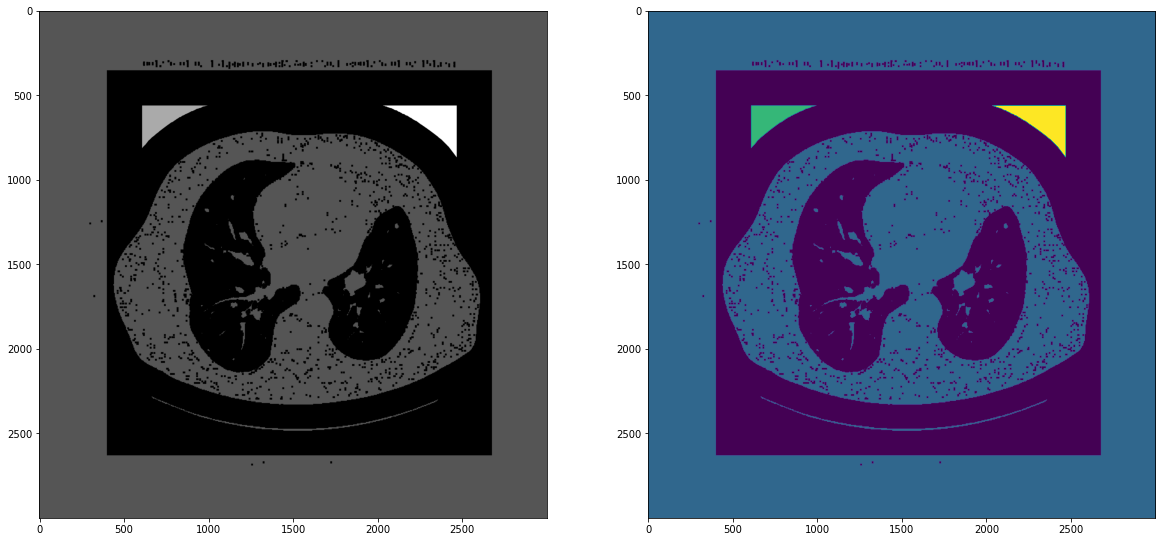

In [ ]:
ret, markers = cv2.connectedComponents(frgr)

markers = markers + 1

markers[unknown==255] = 0

fig = plt.figure(figsize = (20, 10))
plt.subplot(121)
plt.imshow(markers, cmap = 'gray')
plt.subplot(122)
plt.imshow(markers)

Text(0.5, 1.0, 'Expected Segmentation')

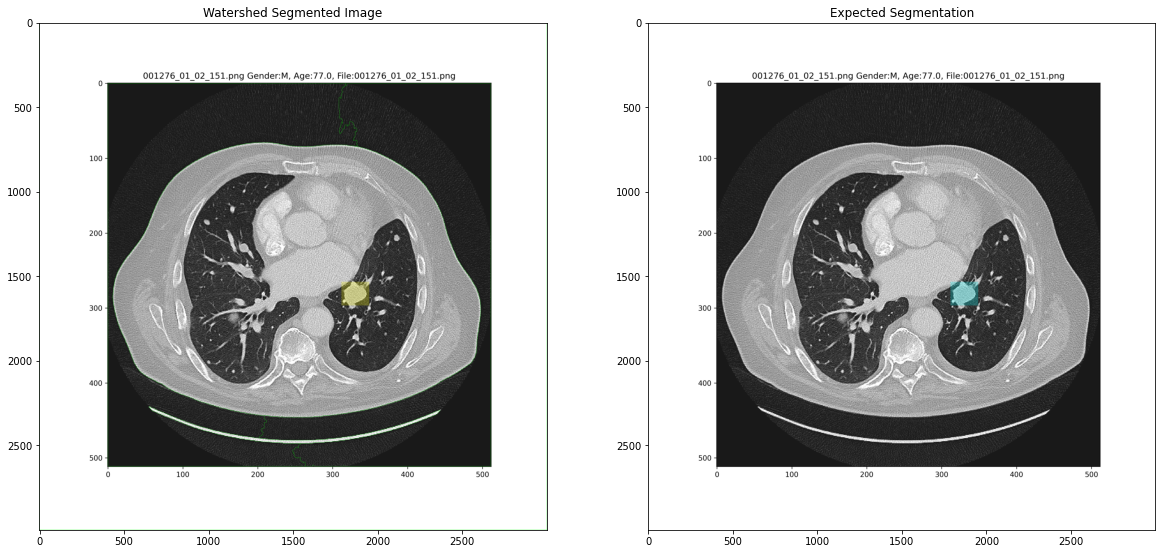

In [ ]:
markers = cv2.watershed(img, markers)
img[markers == -1] = [0, 255,0]

masked_img = cv2.imread('drive/My Drive/masks/001276_01_02_151.png')
fig = plt.figure(figsize = (20, 10))
plt.subplot(121)
plt.imshow(img)
plt.title('Watershed Segmented Image') #Shown by green lines
plt.subplot(122)
plt.imshow(masked_img)
plt.title('Expected Segmentation')

#### Pelvis

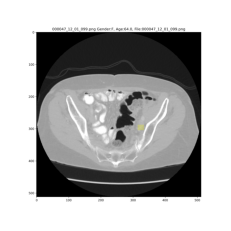

In [ ]:
# read image and show
img_p = cv2.imread('drive/My Drive/masks/000047_12_01_099.png') # in BGR mode
# convert to RGB mode
img_p = cv2.cvtColor(img_p, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img_p)

Threshold limit: 121.0


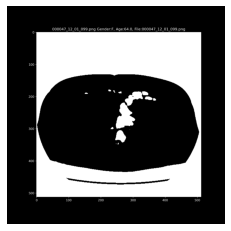

In [ ]:
gray = cv2.cvtColor(img_p,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
print("Threshold limit: " + str(ret))

plt.axis('off')
plt.imshow(thresh, cmap = 'gray')

kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

sure_bg = cv2.dilate(opening, kernel, iterations = 3)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

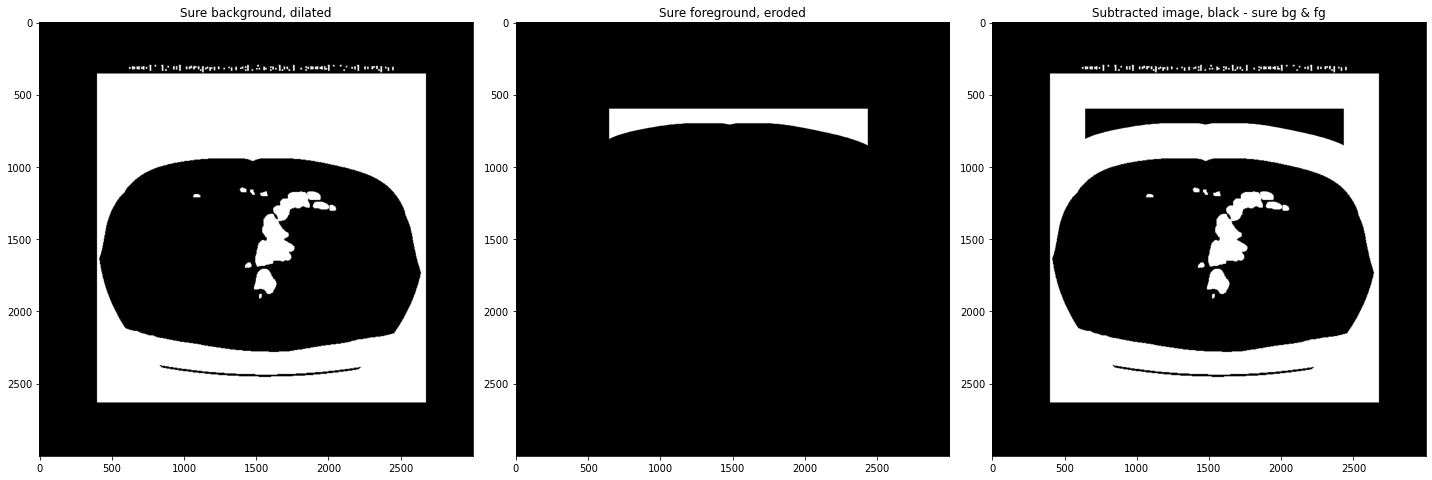

In [ ]:
fig = plt.figure(figsize = (20, 10)) # to change figsize
plt.subplot(131)
plt.imshow(sure_bg, cmap = 'gray')
plt.title('Sure background, dilated')

plt.subplot(132)
plt.imshow(sure_fg, cmap = 'gray')
plt.title('Sure foreground, eroded')

plt.subplot(133)
plt.imshow(unknown, cmap = 'gray')
plt.title('Subtracted image, black - sure bg & fg')
plt.tight_layout()

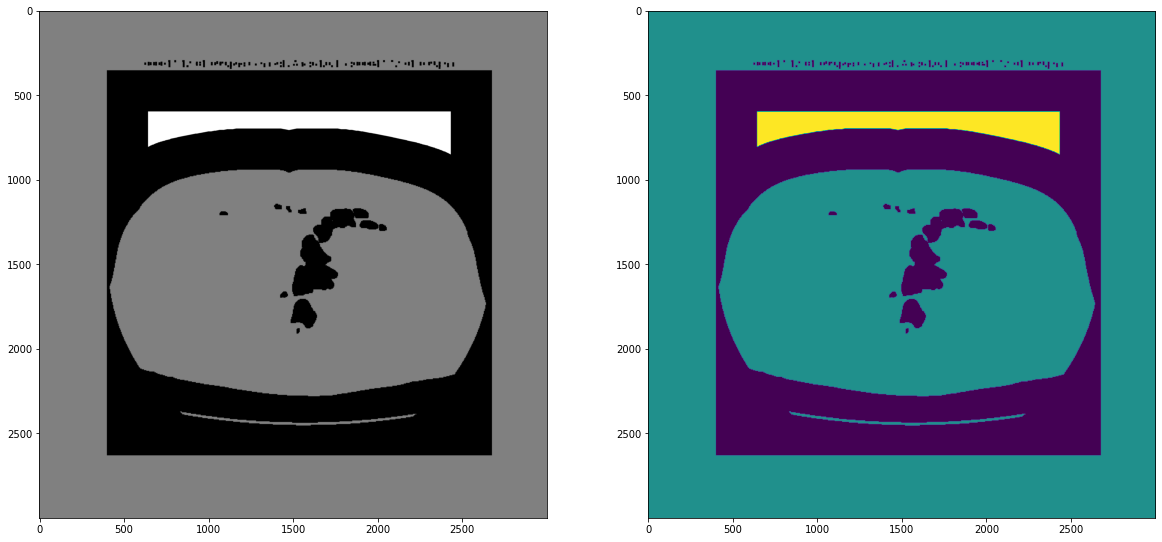

In [ ]:
ret, markers = cv2.connectedComponents(sure_fg)

markers = markers + 1

markers[unknown==255] = 0

fig = plt.figure(figsize = (20, 10)) # to change figsize
plt.subplot(121)
plt.imshow(markers, cmap = 'gray')
plt.subplot(122)
plt.imshow(markers)

Text(0.5, 1.0, 'Expected Segmentation')

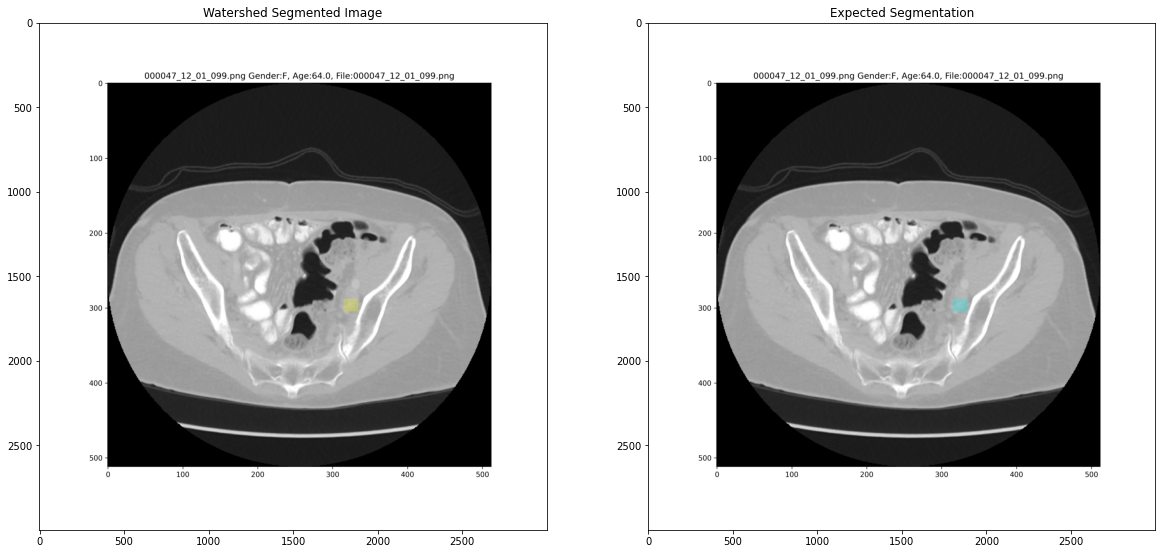

In [ ]:
markers = cv2.watershed(img_p, markers)
img[markers == -1] = [0, 255,0]

masked_img = cv2.imread('drive/My Drive/masks/000047_12_01_099.png')
fig = plt.figure(figsize = (20, 10))
plt.subplot(121)
plt.imshow(img_p)
plt.title('Watershed Segmented Image') #Shown by green lines
plt.subplot(122)
plt.imshow(masked_img)
plt.title('Expected Segmentation')

#### Liver

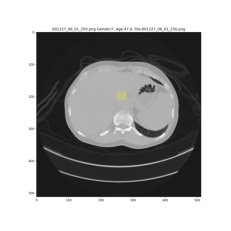

In [ ]:
img = cv2.imread('drive/My Drive/masks/001227_06_01_250.png') # in BGR mode
# convert to RGB mode
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img)

Threshold limit: 132.0


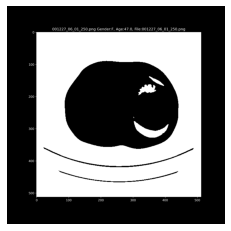

In [ ]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
print("Threshold limit: " + str(ret))

plt.axis('off')
plt.imshow(thresh, cmap = 'gray')

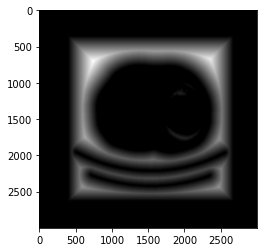

In [ ]:
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations = 3)

# sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

plt.imshow(dist_transform, cmap = 'gray')

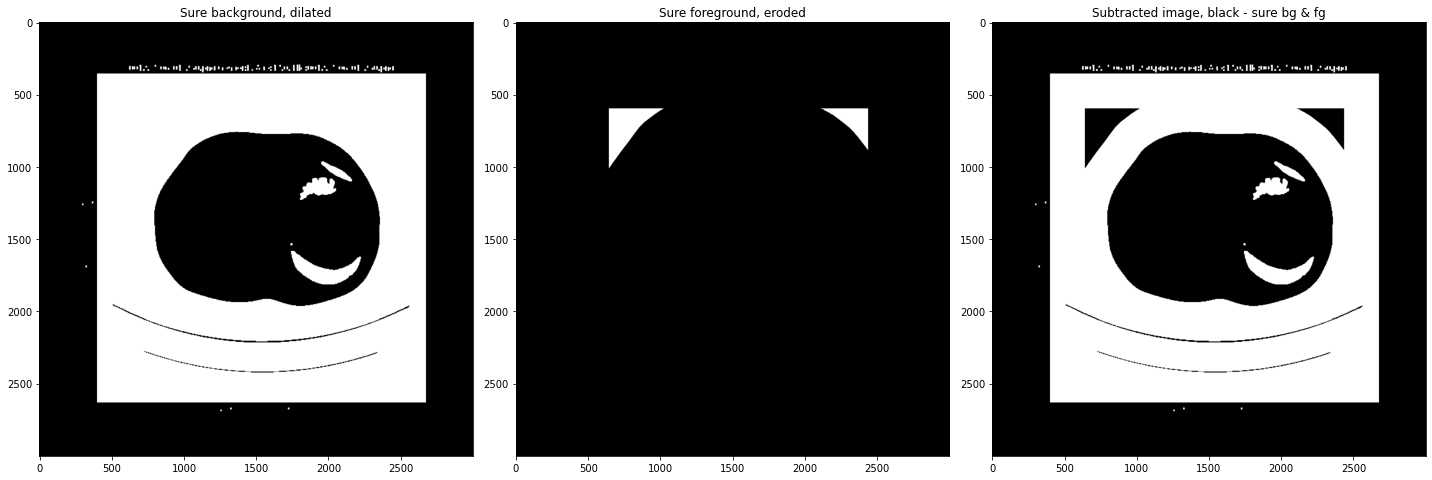

In [ ]:
fig = plt.figure(figsize = (20, 10)) # to change figsize
plt.subplot(131)
plt.imshow(sure_bg, cmap = 'gray')
plt.title('Sure background, dilated')

plt.subplot(132)
plt.imshow(sure_fg, cmap = 'gray')
plt.title('Sure foreground, eroded')

plt.subplot(133)
plt.imshow(unknown, cmap = 'gray')
plt.title('Subtracted image, black - sure bg & fg')
plt.tight_layout()

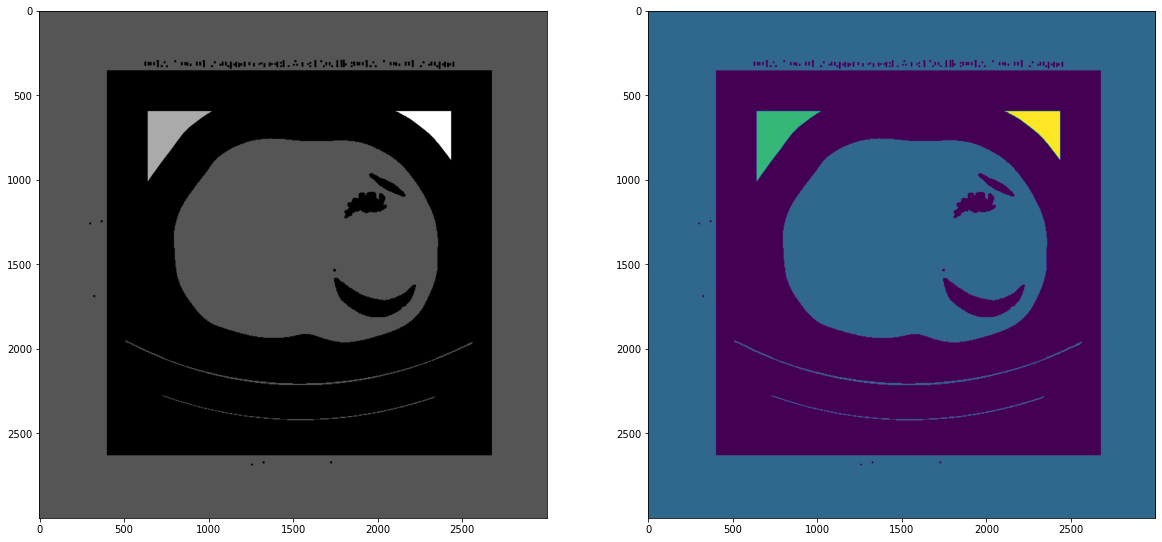

In [ ]:
ret, markers = cv2.connectedComponents(sure_fg)

markers = markers + 1

markers[unknown==255] = 0

fig = plt.figure(figsize = (20, 10)) # to change figsize
plt.subplot(121)
plt.imshow(markers, cmap = 'gray')
plt.subplot(122)
plt.imshow(markers)

Text(0.5, 1.0, 'Expected Segmentation')

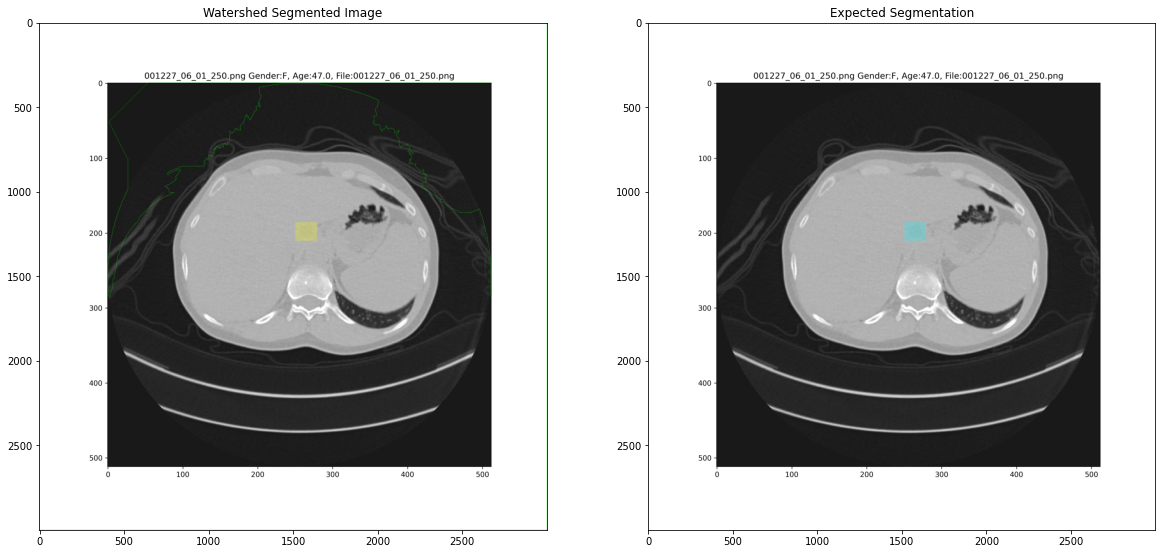

In [ ]:
markers = cv2.watershed(img_p, markers)
img[markers == -1] = [0, 255,0]

masked_img = cv2.imread('drive/My Drive/masks/001227_06_01_250.png')
fig = plt.figure(figsize = (20, 10))
plt.subplot(121)
plt.imshow(img)
plt.title('Watershed Segmented Image') #Shown by green lines
plt.subplot(122)
plt.imshow(masked_img)
plt.title('Expected Segmentation')

#### Abdomen

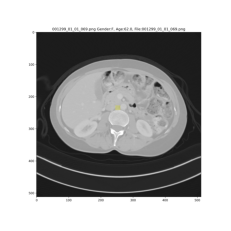

In [ ]:
img = cv2.imread('drive/My Drive/masks/001299_01_01_069.png') # in BGR mode
# convert to RGB mode
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img)

Threshold limit: 130.0


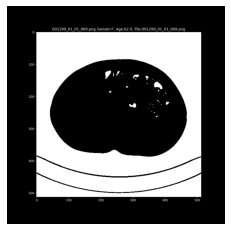

In [ ]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
print("Threshold limit: " + str(ret))

plt.axis('off')
plt.imshow(thresh, cmap = 'gray')

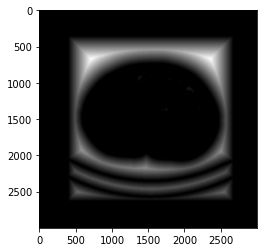

In [ ]:
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations = 3)

# sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

plt.imshow(dist_transform, cmap = 'gray')

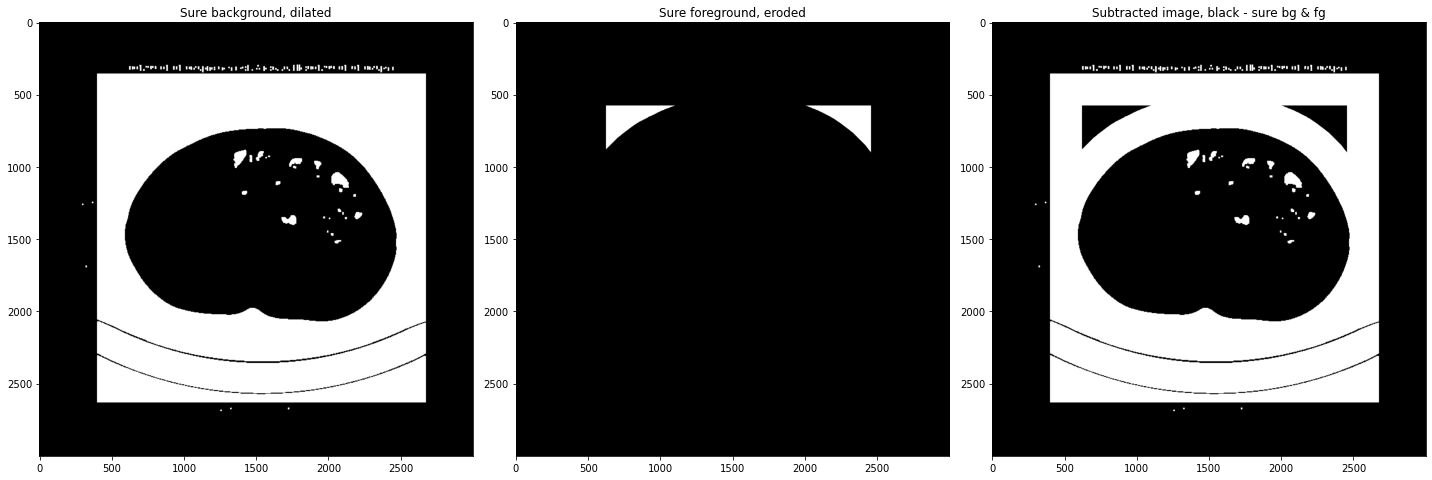

In [ ]:
fig = plt.figure(figsize = (20, 10)) # to change figsize
plt.subplot(131)
plt.imshow(sure_bg, cmap = 'gray')
plt.title('Sure background, dilated')

plt.subplot(132)
plt.imshow(sure_fg, cmap = 'gray')
plt.title('Sure foreground, eroded')

plt.subplot(133)
plt.imshow(unknown, cmap = 'gray')
plt.title('Subtracted image, black - sure bg & fg')
plt.tight_layout()

Text(0.5, 1.0, 'Expected Segmentation')

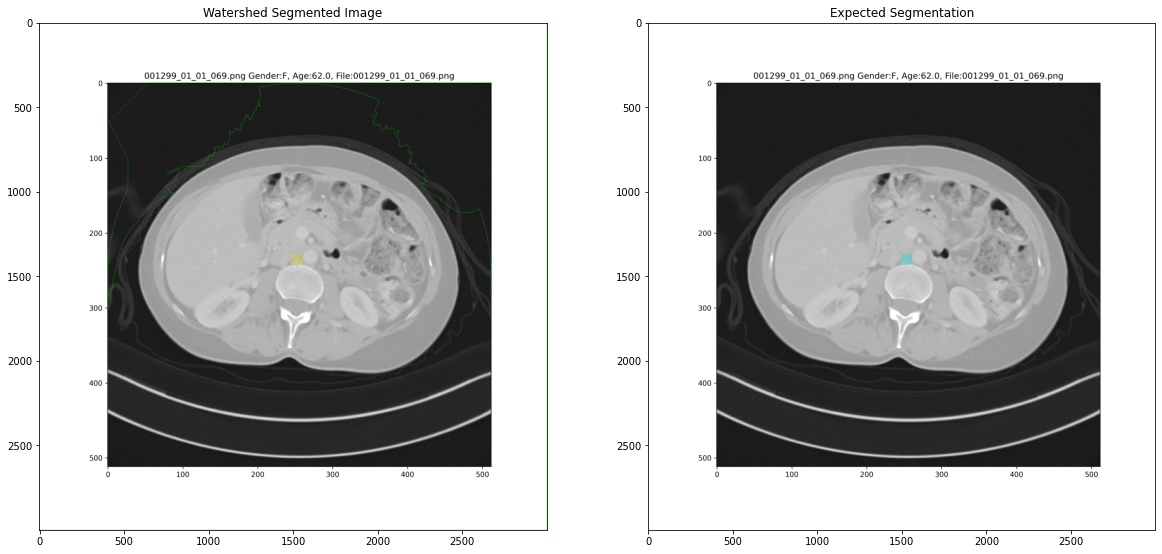

In [ ]:
markers = cv2.watershed(img_p, markers)
img[markers == -1] = [0, 255,0]

masked_img = cv2.imread('drive/My Drive/masks/001299_01_01_069.png')
fig = plt.figure(figsize = (20, 10))
plt.subplot(121)
plt.imshow(img)
plt.title('Watershed Segmented Image') #Shown by green lines
plt.subplot(122)
plt.imshow(masked_img)
plt.title('Expected Segmentation')

# Cancer segmentation with other OpenCV method

#### Lungs

##### Loading data

In [ ]:
masked_img = cv2.imread('drive/My Drive/masks/001276_01_02_151.png') # opens in BGR mode
img_hsv = cv2.cvtColor(masked_img, cv2.COLOR_BGR2HSV)

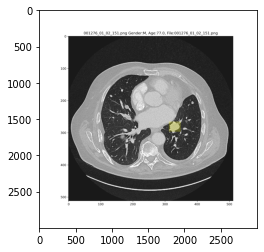

In [ ]:
plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))

##### Thresholding with color

Text(0.5, 1.0, 'Expected Segmentation')

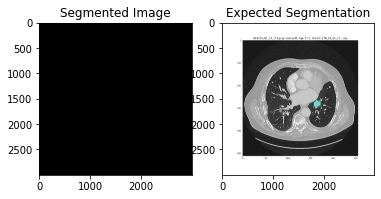

In [ ]:
blue_min = np.array([151, 151, 74], np.uint8) #Providing a wide range of yellow color
blue_max = np.array([255, 255, 74], np.uint8)
threshold_yellow_img = cv2.inRange(img_hsv, blue_min, blue_max)

# show threshold bits
threshold_yellow_img = cv2.cvtColor(threshold_yellow_img, cv2.COLOR_GRAY2RGB)
plt.subplot(121)
plt.imshow(threshold_yellow_img)
plt.title('Segmented Image')
masked_img = cv2.imread('drive/My Drive/masks/001276_01_02_151.png')
plt.subplot(122)
plt.imshow(masked_img)
plt.title('Expected Segmentation')


#### Abdomen

In [ ]:
masked_img = cv2.imread('drive/My Drive/masks/001299_01_01_069.png') # opens in BGR mode
img_hsv = cv2.cvtColor(masked_img, cv2.COLOR_BGR2HSV)

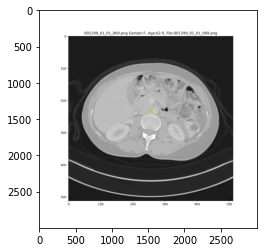

In [ ]:
plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))

Text(0.5, 1.0, 'Expected Segmentation')

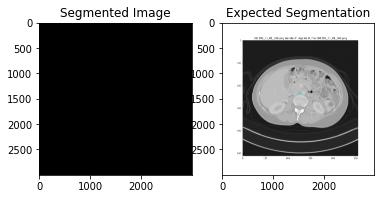

In [ ]:
blue_min = np.array([151, 151, 74], np.uint8) #Providing a wide range of yellow color
blue_max = np.array([255, 255, 74], np.uint8)
threshold_yellow_img = cv2.inRange(img_hsv, blue_min, blue_max)

# show threshold bits
threshold_yellow_img = cv2.cvtColor(threshold_yellow_img, cv2.COLOR_GRAY2RGB)
plt.subplot(121)
plt.imshow(threshold_yellow_img)
plt.title('Segmented Image')
masked_img = cv2.imread('drive/My Drive/masks/001299_01_01_069.png')
plt.subplot(122)
plt.imshow(masked_img)
plt.title('Expected Segmentation')


#### Pelvis

In [ ]:
masked_img = cv2.imread('drive/My Drive/masks/000047_12_01_099.png') # opens in BGR mode
img_hsv = cv2.cvtColor(masked_img, cv2.COLOR_BGR2HSV)

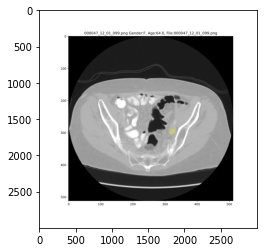

In [ ]:
plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))

Text(0.5, 1.0, 'Expected Segmentation')

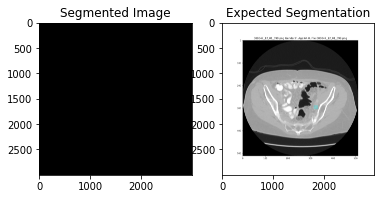

In [ ]:
blue_min = np.array([151, 151, 74], np.uint8) #Providing a wide range of yellow color
blue_max = np.array([255, 255, 74], np.uint8)
threshold_yellow_img = cv2.inRange(img_hsv, blue_min, blue_max)

# show threshold bits
threshold_yellow_img = cv2.cvtColor(threshold_yellow_img, cv2.COLOR_GRAY2RGB)
plt.subplot(121)
plt.imshow(threshold_yellow_img)
plt.title('Segmented Image')
masked_img = cv2.imread('drive/My Drive/masks/000047_12_01_099.png')
plt.subplot(122)
plt.imshow(masked_img)
plt.title('Expected Segmentation')


#### Liver

In [ ]:
masked_img = cv2.imread('drive/My Drive/masks/001227_06_01_250.png') # opens in BGR mode
img_hsv = cv2.cvtColor(masked_img, cv2.COLOR_BGR2HSV)

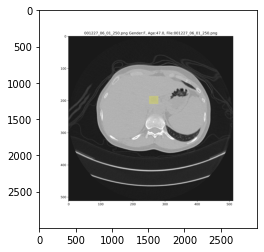

In [ ]:
plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))

Text(0.5, 1.0, 'Expected Segmentation')

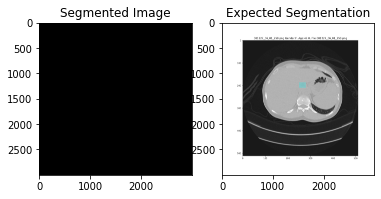

In [ ]:
blue_min = np.array([151, 151, 74], np.uint8) #Providing a wide range of yellow color
blue_max = np.array([255, 255, 74], np.uint8)
threshold_yellow_img = cv2.inRange(img_hsv, blue_min, blue_max)

# show threshold bits
threshold_yellow_img = cv2.cvtColor(threshold_yellow_img, cv2.COLOR_GRAY2RGB)
plt.subplot(121)
plt.imshow(threshold_yellow_img)
plt.title('Segmented Image')
masked_img = cv2.imread('drive/My Drive/masks/001227_06_01_250.png')
plt.subplot(122)
plt.imshow(masked_img)
plt.title('Expected Segmentation')
